In [1]:
from __future__ import print_function, division
import sys
reload(sys)
sys.setdefaultencoding('utf8')
from Utils.common.custerReadFile import read_multi_csv
import numpy as np
import re
from numpy import logical_or, logical_and
import pandas as pd
import xlsxwriter
from Params.path_params import Document_path
%matplotlib inline

In [2]:
xls_file = u"{0}/smy_dev_loan_corr/ios_data_smy.xlsx".format(Document_path)

In [3]:
xls_file

u'/Users/chaoxu/code/local-spark/Document/smy_dev_loan_corr/ios_data_smy.xlsx'

In [4]:
df1 = pd.read_excel(io=xls_file, sheet_name=0)

In [15]:
df1.head(5)

,设备1 tick,设备1 idfa,设备1 idfv,设备1申请状态,设备1贷后表现,设备2 tick,设备2 idfa,设备2 idfv,设备2申请状态,设备2贷后表现,关联度
0,D049FB2C-7160-4CB9-9C8C-B528A2BD7ACB,16016C6E-46B5-4290-90E5-22C1427073E2,D049FB2C-7160-4CB9-9C8C-B528A2BD7ACB,NaN,NaN,AFF74B7B-1A74-4CD4-9AAC-C71824FE7AC3,4C465AC0-3724-4916-BD7E-35A240B1C4C3,AFF74B7B-1A74-4CD4-9AAC-C71824FE7AC3,NaN,NaN,0.900
1,4FEDC48E-0376-419B-9750-0D362B43358C,00000000-0000-0000-0000-000000000000,F62A21B6-C395-4793-BD2A-306342229939,NaN,NaN,4C737588-F6E6-429C-B66C-9EA2318CED96,B13C704A-060D-4D2E-901A-882FFD135676,FE2E369A-DA2B-49C4-A7F1-54BAF372D931,0.0,NaN,0.900
2,0DF14752-6F54-44D0-B9B9-CD9092445F53,8637E21C-6BDD-4490-8384-DB7FF4FDAA27,27C50097-F320-48B7-8955-7F53EFFBFAB1,NaN,NaN,1A5ABC3C-8C40-44A4-A2CC-F367ADD94FEC,E84A30E9-CB89-4BF6-BC56-698A52B6FE16,3ED5DB46-B262-478C-8477-C1A1BA2B6663,1.0,NaN,0.900
3,D560BDD5-B368-4F77-A6B5-F8302089B9A0,3D4B059D-5B90-4226-BE28-3352C6B55E63,F51321CA-C769-4B76-A57F-9476FCA56A24,0.0,NaN,1A5ABC3C-8C40-44A4-A2CC-F367ADD94FEC,E84A30E9-CB89-4BF6-BC56-698A52B6FE16,3ED5DB46-B262-478C-8477-C1A1BA2B6663,1.0,NaN,0.936
4,4A2D1554-B36A-4728-980A-F74EF2EFE71E,7FBE66D5-1F91-471D-A73A-90AE9A3CF54D,A729708B-9723-4695-BB6B-07724F402C23,NaN,NaN,5B8F80DA-FDE7-4606-9F20-37FC8B75271B,7FBE66D5-1F91-471D-A73A-90AE9A3CF54D,A729708B-9723-4695-BB6B-07724F402C23,NaN,NaN,0.900


In [6]:
df1.shape

(8008, 11)

In [16]:
# df1[[u'设备1 tick', u'设备1申请状态', u'设备1贷后表现']].append(df1[[u'设备2 tick', u'设备2申请状态', u'设备2贷后表现']].values)

In [17]:
df_new=pd.DataFrame(np.concatenate([df1[[u'设备1 tick', u'设备1申请状态', u'设备1贷后表现']].values, 
                             df1[[u'设备2 tick', u'设备2申请状态', u'设备2贷后表现']].values]),columns=[u'设备tick', u'设备申请状态', u'设备贷后表现'] )

In [21]:
df_new.head(8)

,设备tick,设备申请状态,设备贷后表现
0,D049FB2C-7160-4CB9-9C8C-B528A2BD7ACB,NaN,NaN
1,4FEDC48E-0376-419B-9750-0D362B43358C,NaN,NaN
2,0DF14752-6F54-44D0-B9B9-CD9092445F53,NaN,NaN
3,D560BDD5-B368-4F77-A6B5-F8302089B9A0,0,NaN
4,4A2D1554-B36A-4728-980A-F74EF2EFE71E,NaN,NaN
5,BA0BA9F3-D7AF-4A8C-8E85-E8DC73191291,NaN,NaN
6,B564E63E-53CB-4A0A-95DB-A557F79617DA,0,NaN
7,B21ADDE1-B188-4C35-8640-8097F9F3BDFA,0,NaN


In [20]:
df_new.drop_duplicates([u'设备tick', u'设备申请状态', u'设备贷后表现']).shape

(5800, 3)

In [9]:
df1[u'设备1 tick'].nunique()

1183

### 前面通过后面通过的比例

In [14]:
df1.loc[df1[u'设备1申请状态'] == 1][u'设备2申请状态'].value_counts(normalize=True)

0.0    0.726115
1.0    0.273885
Name: 设备2申请状态, dtype: float64

### 前面通过后面逾期的比例

In [16]:
df1.loc[df1[u'设备1申请状态'] == 1][u'设备2贷后表现'].value_counts(normalize=True)

1.0    0.9375
0.0    0.0625
Name: 设备2贷后表现, dtype: float64

### 前面不通过后面通过比例

In [17]:
df1.loc[df1[u'设备1申请状态'] == 0][u'设备2申请状态'].value_counts(normalize=True)

0.0    0.764858
1.0    0.235142
Name: 设备2申请状态, dtype: float64

### 前面不通过后面逾期比例

In [18]:
df1.loc[df1[u'设备1申请状态'] == 0][u'设备2贷后表现'].value_counts(normalize=True)

1.0    0.930556
0.0    0.069444
Name: 设备2贷后表现, dtype: float64

### 前面逾期后面通过比例

In [20]:
df1.loc[df1[u'设备1贷后表现'] == 0][u'设备2申请状态'].value_counts(normalize=True)

0.0    0.833333
1.0    0.166667
Name: 设备2申请状态, dtype: float64

### 前面逾期后面逾期比例

In [22]:
df1.loc[df1[u'设备1贷后表现'] == 0][u'设备2贷后表现'].value_counts(normalize=True)

1.0    1.0
Name: 设备2贷后表现, dtype: float64

### 前面不逾期后面通过比例

In [24]:
df1.loc[df1[u'设备1贷后表现'] == 1][u'设备2申请状态'].value_counts(normalize=True)

0.0    0.734848
1.0    0.265152
Name: 设备2申请状态, dtype: float64

### 前面不逾期后面逾期比例

In [37]:
df1.loc[df1[u'设备1贷后表现'] == 1][u'设备2申请状态'].value_counts(normalize=True)

0.0    0.734848
1.0    0.265152
Name: 设备2申请状态, dtype: float64

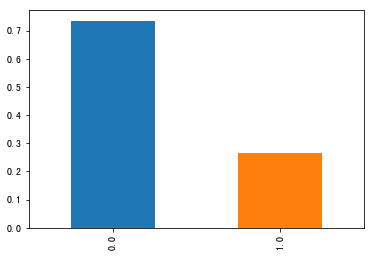

In [38]:
df1.loc[df1[u'设备1贷后表现'] == 1][u'设备2申请状态'].value_counts(normalize=True).plot(kind='bar')

In [31]:
df1.loc[df1[u'设备1贷后表现'] == 0][u'设备2申请状态'].value_counts()

0.0    5
1.0    1
Name: 设备2申请状态, dtype: int64

In [32]:
df1.loc[df1[u'设备1贷后表现'] == 0][u'设备2申请状态'].value_counts().values

array([5, 1])

In [36]:
df1.loc[df1[u'设备1贷后表现'] == 0][u'设备2申请状态'].value_counts().index.tolist()

[0.0, 1.0]

In [42]:
df1.loc[(df1[u'设备1贷后表现'] == 0) | (df1[u'设备2贷后表现'] == 0)].shape

(34, 11)

In [43]:
xls_file2 = u'/Users/chaoxu/code/local-spark/Document/smy_dev_loan_corr/android_data_v2_smy.xlsx'

In [44]:
df2 = pd.read_excel(io=xls_file2, sheet_name=0)

In [45]:
df2.head(3)

,设备1 tick,设备1 imei,设备1_aid,设备1申请状态,设备1贷后表现,设备2_tick,设备2 imei,设备2 aid,设备2申请状态,设备2贷后表现,关联度
0,8f915fc3-4180-443d-9906-219fc30befd62,a000004fdf7cfc,d6d9b36e6cb96ac3,NaN,NaN,61ba8893-9a51-4cad-a593-3146bdef5b6e2,a00000550ecd35,b68bdfd751bec037,NaN,NaN,0.96
1,1e702bcc-819e-4edb-9be7-bb651e40b4192,866491033324637,c48fb6280ba35cb5,NaN,NaN,8acaa58f-168d-4655-b62d-d1119819e56d2,864394033680697,a511092a70814fbb,NaN,NaN,0.98
2,58d7d46d-aee0-46aa-90a9-f94e0ca0cd882,110ee890aca3ba1,14ce44b74b6cc651,NaN,NaN,32b0c122-5917-466d-a77c-82f5b950e1302,0fb62bacc414f45,14ce44b74b6cc651,NaN,NaN,1.00


In [46]:
df2.shape

(4136, 11)

In [47]:
df2.loc[df2[u'设备1申请状态'] == 1].shape

(51, 11)

In [50]:
df2.loc[df2[u'设备1申请状态'].isnull()].shape[0]

3566